<a href="https://colab.research.google.com/github/habibekaya/Google_stock_price_with_LSTM/blob/main/HAB%C4%B0BEbitimeprojesi2LSTM_ipynb_adl%C4%B1_not_defterinin_kopyas%C4%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


In [ ]:
df= pd.read_csv("Google_Stock_Price_Train.csv",index_col="Date",parse_dates=True)

In [ ]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"


In [ ]:
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2016-12-23,790.90,792.74,787.28,789.91,"623,400"
2016-12-27,790.68,797.86,787.66,791.55,"789,100"
2016-12-28,793.70,794.23,783.20,785.05,"1,153,800"
2016-12-29,783.33,785.93,778.92,782.79,"744,300"
2016-12-30,782.75,782.78,770.41,771.82,"1,770,000"


In [ ]:
df.isna().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [ ]:
df.shape

(1258, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   object 
 4   Volume  1258 non-null   object 
dtypes: float64(3), object(2)
memory usage: 59.0+ KB


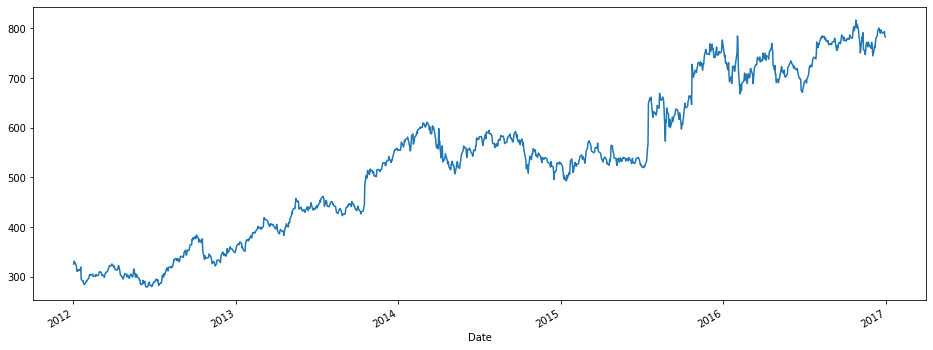

In [ ]:
df['Open'].plot(figsize=(16,6))

In [ ]:
#df["Close"] = df["Close"].str.replace(',', '').astype(float)

In [ ]:
 #plot baseline and predictions

In [ ]:

df = df.iloc[:, 1: 2].values


In [ ]:
df

array([[332.83],
       [333.87],
       [330.75],
       ...,
       [794.23],
       [785.93],
       [782.78]])

In [ ]:
df.shape

(1258, 1)

In [ ]:
type(df)

numpy.ndarray

In [ ]:
df.ndim

2

In [ ]:
df.shape


(1258, 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
#veriyi işleme 


In [ ]:
sc = MinMaxScaler(feature_range = (0, 1))

In [ ]:
df= sc.fit_transform(df.reshape(-1,1))
#fit_transformOrijinal veri setini değiştirmek için yöntemi kullanmamız gerekiyor 

In [ ]:
1,2,3,4,5
1,2=3
2,3=4

In [ ]:
x_df_train =[]
y_df_train=[]

In [ ]:
timestep=50
for i in range (timestep,len(df)):
  x_df_train.append(df[i-timestep:i , 0])
  y_df_train.append(df[i,0])
  if i<=50:
    print(x_df_train)
    print(y_df_train)
    print()



#import numpy
# convert an array of values into a dataset matrix
#def create_dataset(dataset, time_step=1):
#	dataX, dataY = [], []
	#for i in range(len(dataset)-time_step-1):
	#	a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
	#	dataX.append(a)
	#	dataY.append(dataset[i + time_step, 0])
	#return numpy.array(dataX), numpy.array(dataY)

[array([0.09640129, 0.09834351, 0.09251685, 0.08881917, 0.07671765,
       0.06444805, 0.06033951, 0.063589  , 0.05806114, 0.06274861,
       0.06463481, 0.07113377, 0.02463257, 0.02244757, 0.02153249,
       0.01318468, 0.00926289, 0.01469737, 0.01439857, 0.01811493,
       0.01951557, 0.02035595, 0.03027247, 0.04306497, 0.04173903,
       0.04355053, 0.04648253, 0.0405625 , 0.04586625, 0.04416681,
       0.04502587, 0.04119745, 0.04009562, 0.04963864, 0.0486115 ,
       0.04037574, 0.04383065, 0.04450296, 0.0513941 , 0.05680991,
       0.05690328, 0.05531589, 0.05391525, 0.04119745, 0.04340112,
       0.04369993, 0.04407343, 0.03951669, 0.04960128, 0.05419538])]
[0.05486768633163386]



In [ ]:

x_df_train = np.array(x_df_train)
y_df_train = np.array(y_df_train) 


In [ ]:
x_df_train=np.reshape( x_df_train,(x_df_train.shape[0] ,x_df_train.shape[1],1))
x_df_train

array([[[0.09640129],
        [0.09834351],
        [0.09251685],
        ...,
        [0.03951669],
        [0.04960128],
        [0.05419538]],

       [[0.09834351],
        [0.09251685],
        [0.08881917],
        ...,
        [0.04960128],
        [0.05419538],
        [0.05486769]],

       [[0.09251685],
        [0.08881917],
        [0.07671765],
        ...,
        [0.05419538],
        [0.05486769],
        [0.05710871]],

       ...,

       [[0.94242441],
        [0.9718565 ],
        [0.97744038],
        ...,
        [0.95637477],
        [0.95529161],
        [0.96485331]],

       [[0.9718565 ],
        [0.97744038],
        [0.97626384],
        ...,
        [0.95529161],
        [0.96485331],
        [0.95807422]],

       [[0.97744038],
        [0.97626384],
        [0.96791604],
        ...,
        [0.96485331],
        [0.95807422],
        [0.94257381]]])

In [ ]:
 print(x_df_train)

[[[0.09640129]
  [0.09834351]
  [0.09251685]
  ...
  [0.03951669]
  [0.04960128]
  [0.05419538]]

 [[0.09834351]
  [0.09251685]
  [0.08881917]
  ...
  [0.04960128]
  [0.05419538]
  [0.05486769]]

 [[0.09251685]
  [0.08881917]
  [0.07671765]
  ...
  [0.05419538]
  [0.05486769]
  [0.05710871]]

 ...

 [[0.94242441]
  [0.9718565 ]
  [0.97744038]
  ...
  [0.95637477]
  [0.95529161]
  [0.96485331]]

 [[0.9718565 ]
  [0.97744038]
  [0.97626384]
  ...
  [0.95529161]
  [0.96485331]
  [0.95807422]]

 [[0.97744038]
  [0.97626384]
  [0.96791604]
  ...
  [0.96485331]
  [0.95807422]
  [0.94257381]]]


In [ ]:

print(y_df_train)

[0.05486769 0.05710871 0.06767886 ... 0.95807422 0.94257381 0.93669113]


In [ ]:
print(x_df_train.shape)
print(y_df_train.shape)

(1208, 50, 1)
(1208,)


In [ ]:

#x_df.shape

In [ ]:
x_df_train.shape[2]

1

In [ ]:
print(x_df_train.shape)

(1208, 50, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [ ]:
#Sequentialsınıf, zaman içinde katman dizileri ekleyerek sinir ağları oluşturmak için tasarlanmıştır. sequentialı nesneye ata. sinir ağını başlatmak için
rnn= Sequential()


In [ ]:
#ilk LSTM katmanını eklemek için add
#3argüman eklemem lazım 1-units:nöron boyutsallığı 2-return_sequences = True ya da false:tekrar Lstm katmanı ekleyecek miyim son katman mı 
#3-input_shape :zaman adımları-tahmin edicilerin sayısı benim  timestep 40 mesela


In [ ]:
rnn.add(LSTM(units =45 ,return_sequences=True ,input_shape=(x_df_train.shape[1],1) ))
#x_df.shape[1]Tekrarlayan sinir ağını daha sonraki bir tarihte daha büyük bir model üzerinde eğitmeye karar vermemiz durumunda, sabit kodlanmış değer yerine kullandığımı

In [ ]:
rnn.add(Dropout(0.2))
#yaygın olan %20 bırakma olduğu için 

In [ ]:
rnn.add(LSTM(units=45,return_sequences=True,))
rnn.add(Dropout(0.2))
rnn.add(LSTM(units=45,return_sequences=False))
rnn.add(Dropout(0.2))

In [ ]:
#for i in [True, True, False]:
 #  rnn.add(LSTM(units = 45, return_sequences = i))
  # rnn.add(Dropout(0.2))

In [ ]:
rnn.add(Dense(units=1))
#çıktı olarak sadece 1 değer tahmin edecek

In [ ]:
#derlene yapılacak
rnn.compile(optimizer = 'adam', loss = 'mean_squared_error')
rnn.fit(x_df_train, y_df_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 9s 77ms/step - loss: 0.0390
Epoch 2/100
38/38 [==============================] - 3s 77ms/step - loss: 0.0054
Epoch 3/100
38/38 [==============================] - 5s 122ms/step - loss: 0.0053
Epoch 4/100
38/38 [==============================] - 3s 76ms/step - loss: 0.0054
Epoch 5/100
38/38 [==============================] - 3s 76ms/step - loss: 0.0048
Epoch 6/100
38/38 [==============================] - 3s 79ms/step - loss: 0.0045
Epoch 7/100
38/38 [==============================] - 3s 79ms/step - loss: 0.0043
Epoch 8/100
38/38 [==============================] - 3s 77ms/step - loss: 0.0042
Epoch 9/100
38/38 [==============================] - 3s 76ms/step - loss: 0.0043
Epoch 10/100
38/38 [==============================] - 3s 77ms/step - loss: 0.0042
Epoch 11/100
38/38 [==============================] - 3s 76ms/step - loss: 0.0041
Epoch 12/100
38/38 [==============================] - 3s 77ms/step - loss: 0.0040
Epoch 13/100
38/38 [====

In [ ]:
test_data = pd.read_csv('Google_Stock_Price_Test.csv')

abc = test_data.iloc[:, 1: 2].values


In [ ]:
olc_data = pd.read_csv('Google_Stock_Price_Train.csv')
olc_test_data = pd.read_csv('Google_Stock_Price_Test.csv')

In [ ]:


olc_test_data = olc_test_data.iloc[:, 1: 2].values


In [ ]:
df= pd.read_csv("Google_Stock_Price_Train.csv",index_col="Date",parse_dates=True)

In [ ]:
data = pd.concat((olc_data['Open'], olc_test_data['Open']), axis = 0)

In [ ]:
x_test_data = data[len(data) - len(olc_test_data) - 45:].values

In [ ]:
x_test_data = np.reshape(x_test_data, (-1, 1))

In [ ]:
x_test_data = sc.transform(x_test_data)

In [ ]:
x_test_data_fin = []

for i in range(50, len(x_test_data)):

    x_test_data_fin.append(x_test_data[i-50:i, 0])

x_test_data_fin = np.array(x_test_data_fin)

In [ ]:

x_test_data_fin = np.reshape(x_test_data_fin, (x_test_data_fin.shape[0], 

                                               x_test_data_fin.shape[1], 

                                               1))


In [ ]:
x_test_data_fin.shape

(15, 50, 1)

In [ ]:
predict = rnn.predict(x_test_data_fin)

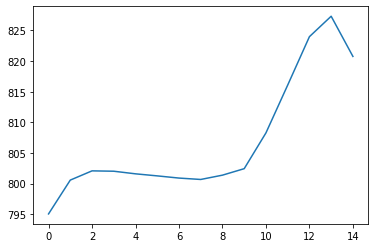

In [ ]:
olc_predict = sc.inverse_transform(predict)
plt.plot(olc_predict)



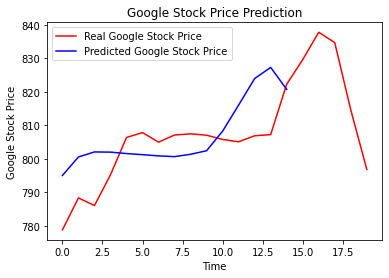

In [ ]:
plt.plot(olc_test_data, color = 'red', label = 'Real Google Stock Price')
plt.plot(olc_predict, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()
